#### TASK 02: Data Preparation

1. Reading and combining data

In [1]:
import pandas as pd
import numpy as np
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [2]:
path ='PassengerVehicle_Stats/*.csv'  
csv_files = glob.glob(path)

# Load all CSV files into a list
dataframes = [pd.read_csv(file) for file in csv_files]

# Concatenate all dataframes into a single DataFrame
vehicles_df = pd.concat(dataframes, ignore_index=True)

# Display the first few rows of the combined DataFrame
vehicles_df.head()

,Unnamed: 0,Public Vehicle Number,Status,Vehicle Make,Vehicle Model,Vehicle Model Year,Vehicle Color,Vehicle Fuel Source,Wheelchair Accessible,Company Name,Address,City,State,ZIP Code,Taxi Affiliation,Taxi Medallion License Management,Record ID
0,1286,12009,RESERVED,CHEVROLET,EXPRESS,2014.0,BLACK,Bio-Diesel,N,CHICAGO PRIVATE TOURS LLC,4567 S. OAKENWALD AVE.,CHICAGO,IL,60653.0,NaN,NaN,12009Charter Sightseeing
1,2095,12248,INACTIVE,MERCEDES,SPRINTER,2010.0,SILVER,Bio-Diesel,N,O'HARE-MIDWAY LIMOUSINE SERVICE INC # 2,4610 N. CLARK ST.,CHICAGO,IL,60640.0,NaN,NaN,12248Charter Sightseeing
2,7950,13527,INACTIVE,VAN HOOL,TD925,2008.0,RED,Bio-Diesel,N,"TRT TRANSPORTATION, INC.",4400 S. RACINE AVE.,CHICAGO,IL,60609.0,NaN,NaN,13527Charter Sightseeing
3,8700,12248,INACTIVE,MERCEDES,SPRINTER,2010.0,SILVER,Bio-Diesel,N,O'HARE-MIDWAY LIMOUSINE SERVICE INC # 2,4610 N. CLARK ST.,CHICAGO,IL,60640.0,NaN,NaN,12248Charter Sightseeing
4,9359,13528,INACTIVE,VAN HOOL,TD925,2008.0,RED,Bio-Diesel,N,"TRT TRANSPORTATION, INC.",4400 S. RACINE AVE.,CHICAGO,IL,60609.0,NaN,NaN,13528Charter Sightseeing


In [3]:
vehicles_df.to_csv('combined_vehicles.csv', index=False)

In [7]:
# No. of records and columns
vehicles_df.shape

(16602, 17)

2. Initial data exploration and cleaning

Examine dataFrame structure 

In [8]:
# Displays a concise summary of the DataFrame
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16602 entries, 0 to 16601
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          16602 non-null  int64  
 1   Public Vehicle Number               16602 non-null  int64  
 2   Status                              16602 non-null  object 
 3   Vehicle Make                        14685 non-null  object 
 4   Vehicle Model                       14639 non-null  object 
 5   Vehicle Model Year                  14660 non-null  float64
 6   Vehicle Color                       14616 non-null  object 
 7   Vehicle Fuel Source                 16602 non-null  object 
 8   Wheelchair Accessible               16602 non-null  object 
 9   Company Name                        16602 non-null  object 
 10  Address                             14816 non-null  object 
 11  City                                14816

In [9]:
# Descriptive statistics for numeric columns in the DataFrame
vehicles_df.describe()

,Unnamed: 0,Public Vehicle Number,Vehicle Model Year,ZIP Code
count,16602.00000,1.660200e+04,14660.000000,14816.000000
mean,8300.50000,3.854566e+04,2012.669714,60612.519573
std,4792.72892,1.372946e+05,83.622806,104.290880
min,0.00000,0.000000e+00,0.000000,60004.000000
25%,4150.25000,3.633250e+03,2013.000000,60619.000000
50%,8300.50000,6.991500e+03,2016.000000,60631.000000
75%,12450.75000,1.683925e+04,2021.000000,60646.000000
max,16601.00000,6.902206e+06,2025.000000,61111.000000


In [10]:
# Returns the number of unique values for each column in the DataFrame
vehicles_df.nunique()

Unnamed: 0                            16602
Public Vehicle Number                 14473
Status                                    8
Vehicle Make                             86
Vehicle Model                           292
Vehicle Model Year                       48
Vehicle Color                            88
Vehicle Fuel Source                       9
Wheelchair Accessible                     2
Company Name                           7494
Address                                2366
City                                     37
State                                     1
ZIP Code                                 92
Taxi Affiliation                         24
Taxi Medallion License Management        10
Record ID                             15667
dtype: int64

Check for Duplicates

In [12]:
vehicles_df.duplicated().sum()

np.int64(0)

In [13]:
vehicles_df[vehicles_df.duplicated()]

,Unnamed: 0,Public Vehicle Number,Status,Vehicle Make,Vehicle Model,Vehicle Model Year,Vehicle Color,Vehicle Fuel Source,Wheelchair Accessible,Company Name,Address,City,State,ZIP Code,Taxi Affiliation,Taxi Medallion License Management,Record ID


Remove duplicate records

In [14]:
#If any. But no duplicates in this dataset
vehicles_df = vehicles_df.drop_duplicates()

Check for null values

In [15]:
vehicles_df[vehicles_df.isnull().any(axis=1)]

,Unnamed: 0,Public Vehicle Number,Status,Vehicle Make,Vehicle Model,Vehicle Model Year,Vehicle Color,Vehicle Fuel Source,Wheelchair Accessible,Company Name,Address,City,State,ZIP Code,Taxi Affiliation,Taxi Medallion License Management,Record ID
0,1286,12009,RESERVED,CHEVROLET,EXPRESS,2014.0,BLACK,Bio-Diesel,N,CHICAGO PRIVATE TOURS LLC,4567 S. OAKENWALD AVE.,CHICAGO,IL,60653.0,NaN,NaN,12009Charter Sightseeing
1,2095,12248,INACTIVE,MERCEDES,SPRINTER,2010.0,SILVER,Bio-Diesel,N,O'HARE-MIDWAY LIMOUSINE SERVICE INC # 2,4610 N. CLARK ST.,CHICAGO,IL,60640.0,NaN,NaN,12248Charter Sightseeing
2,7950,13527,INACTIVE,VAN HOOL,TD925,2008.0,RED,Bio-Diesel,N,"TRT TRANSPORTATION, INC.",4400 S. RACINE AVE.,CHICAGO,IL,60609.0,NaN,NaN,13527Charter Sightseeing
3,8700,12248,INACTIVE,MERCEDES,SPRINTER,2010.0,SILVER,Bio-Diesel,N,O'HARE-MIDWAY LIMOUSINE SERVICE INC # 2,4610 N. CLARK ST.,CHICAGO,IL,60640.0,NaN,NaN,12248Charter Sightseeing
4,9359,13528,INACTIVE,VAN HOOL,TD925,2008.0,RED,Bio-Diesel,N,"TRT TRANSPORTATION, INC.",4400 S. RACINE AVE.,CHICAGO,IL,60609.0,NaN,NaN,13528Charter Sightseeing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16597,16143,42,ACTIVE,PRECISION,6 SEATER,2020.0,FUSCIA,Pedal,N,JBL PEDICAB MANAGEMENT LLC,1627 N. TRIPP AVE.,CHICAGO,IL,60639.0,NaN,NaN,42Pedicab
16598,16151,52,ACTIVE,SCHWINN,NONE,2014.0,GREEN,Pedal,N,BM PEDICAB INC.,4450 N. KEDZIE AVE.,CHICAGO,IL,60625.0,NaN,NaN,52Pedicab
16599,16216,70,VIOLATION,MAINSTREET,CLASSIC,0.0,RED/BLACK,Pedal,N,EMPIRE PEDICAB LLC,318 W. ADAMS ST.,CHICAGO,IL,60606.0,NaN,NaN,70Pedicab
16600,16229,57,VIOLATION,MAINSTREET,BOARDWALK,2011.0,RED,Pedal,N,CARGILL C KELLY II,2428 W. 24TH PL.,CHICAGO,IL,60608.0,NaN,NaN,57Pedicab


In [16]:
# Check for null values
null_summary = vehicles_df.isnull().sum()
print(null_summary)

Unnamed: 0                               0
Public Vehicle Number                    0
Status                                   0
Vehicle Make                          1917
Vehicle Model                         1963
Vehicle Model Year                    1942
Vehicle Color                         1986
Vehicle Fuel Source                      0
Wheelchair Accessible                    0
Company Name                             0
Address                               1786
City                                  1786
State                                 1786
ZIP Code                              1786
Taxi Affiliation                      9254
Taxi Medallion License Management     9281
Record ID                                0
dtype: int64


Remove null records 

3. Handle outliers and missing values 

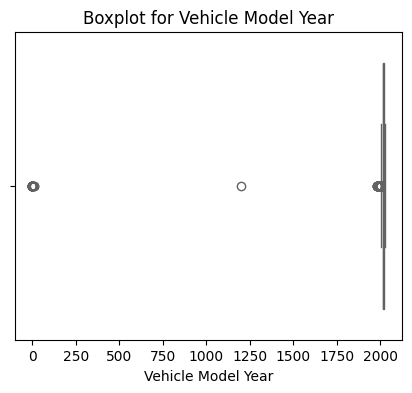

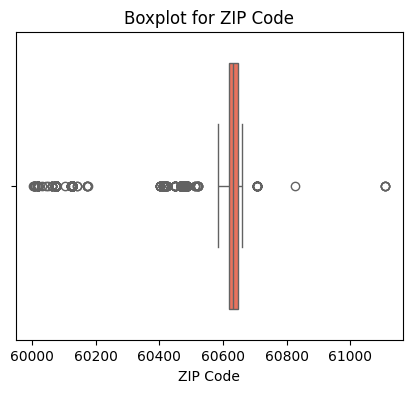

In [4]:
for column in ['Vehicle Model Year', 'ZIP Code']:
    plt.figure(figsize=(5, 4))
    sns.boxplot(x=vehicles_df[column], color='tomato')
    plt.title(f'Boxplot for {column}')
    plt.show()

In [5]:
# Check for outliers using z-scores
features = ['Vehicle Model Year','ZIP Code']      #Only checked the the possible numerical features
z_scores = np.abs(zscore(vehicles_df[features]))
outlier_indices = np.where(z_scores > 3)  # Threshold for identifying outliers
print(f"\nNumber of outliers detected: {len(outlier_indices[0])}")

# Get the rows that correspond to the outliers
outliers = vehicles_df.iloc[outlier_indices[0]]

# Display the outliers
print(vehicles_df[features].iloc[outlier_indices[0]])


Number of outliers detected: 0
Empty DataFrame
Columns: [Vehicle Model Year, ZIP Code]
Index: []


No outliers to be removed